# Concept Drift in a real dataset

INSECTS Dataset - Aplicação Real com Concept Drift


O dataset é originado de um sistema de armadilhas eletrônicas inteligentes que usam sensores ópticos para:

- Detectar em tempo real a passagem de insetos voadores,

- Classificar a espécie do inseto usando aprendizado de máquina,

- Capturar seletivamente apenas espécies de interesse (ex: mosquitos transmissores de doenças ou pragas agrícolas).


![Imagem de uma armadilha eletrônica para insetos](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTFdbomhwDVpnPylE8Jt6j5DW06WcVdUoeoQ&s)


### Desenvolvimento e Contexto

Este sistema foi desenvolvido por um grupo de pesquisa com foco em controle ambiental e agrícola. Ele utiliza sensores físicos, como sensores ópticos ou acústicos, para capturar sinais dos insetos. Com base nesses sinais, o sistema toma decisões em tempo real sobre capturar ou liberar os insetos, contribuindo para a redução do impacto ambiental ao liberar espécies que não são alvos.

Desenvolvido por um grupo de pesquisa no contexto de controle ambiental e agrícola, envolve sensores físicos que captam sinais (possivelmente ópticos ou acústicos). O sistema toma decisões em tempo real sobre capturar ou liberar o inseto, reduz o impacto ambiental ao liberar insetos que não são alvos.

Como o comportamento dos insetos e o ambiente podem variar com o tempo, clima, localidade, ou estação, o sistema precisa lidar com:

- Mudança nos padrões dos dados de entrada (ex: diferentes voos ou espécies ao longo do dia),

- Mudança no conceito de classificação (ex: variação no padrão de uma espécie por estação do ano).

- Este é um caso real em que a detecção de drift de conceito é essencial para manter a acurácia e a eficiência ambiental do sistema ao longo do tempo.

Padrão de comportamento durante o dia de uma espécie de mosquito:

![Imagem de uma armadilha eletrônica para insetos](/home/guilherme/Downloads/drift_vs/graph_insects.png)




O conjunto de dados contém atributos numéricos derivados de sinais ópticos (ex.: intensidade de reflexão, frequência de batimento de asas, tamanho estimado).



O dataset contém 6 classes balanceadas, representando espécies fictícias (mas plausíveis) de insetos voadores:

- Aedes communis (simula um mosquito)

- Bombus terrestis (simula um zangão)

- Culex pipiens (simula outro mosquito)

- Drosophila melanogaster (mosca-da-fruta)

- Ephemera vulgata (efêmera)

- Harmonia axyridis (joaninha)

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Step 2: Load the dataset
df = pd.read_csv('INSECTS-incremental_balanced_norm.csv')



In [ ]:
df["Class"].value_counts()

,count
Class,
3.0,5903
5.0,5900
4.0,5898
2.0,5898
0.0,5893
1.0,5893


In [ ]:

# Step 3: Split into features and labels
X = df.drop('Class', axis=1)

y = df['Class']

N=1000

#Step 4: Split into training and test sets
X_train = X.iloc[:N]
y_train = y.iloc[:N]

X_test = X.iloc[N:]
y_test = y.iloc[N:]



In [ ]:


y_train.value_counts()

,count
Class,
5.0,168
0.0,167
3.0,167
4.0,167
2.0,166
1.0,165


##  Computando a eficácia do método (usando o treinamento de tamanho N)

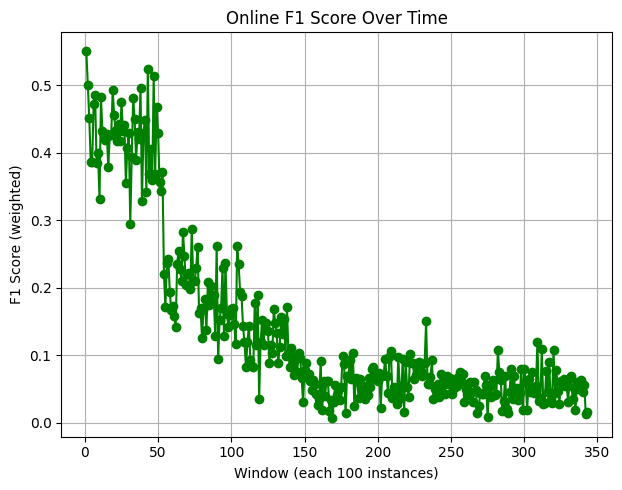

In [ ]:
accuracies = []
f1_scores = []
window_size = 100

true_labels = []
predicted_labels = []

# # Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


for i in range(len(X_test)):
    x_i = X_test.iloc[i:i+1]
    y_i = y_test.iloc[i:i+1].values[0]

    pred = rf.predict(x_i)[0]

    true_labels.append(y_i)
    predicted_labels.append(pred)

    # At end of each window, calculate metrics
    if (i + 1) % window_size == 0:

        f1 = f1_score(true_labels, predicted_labels, average='macro')
        #print(i, "f1 score: ", f1)
        f1_scores.append(f1)


        true_labels = []
        predicted_labels = []

        # if i > 10000:
        #     break
# Step 7: Plot accuracy and F1 score
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', color='green')
plt.xlabel(f'Window (each {window_size} instances)')
plt.ylabel('F1 Score (weighted)')
plt.title('Online F1 Score Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


## Retreinar o modelo

In [ ]:
# # Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

9999 f1 score:  0.32075449307322207
19999 f1 score:  0.0914679088337375
29999 f1 score:  0.0599069032212455


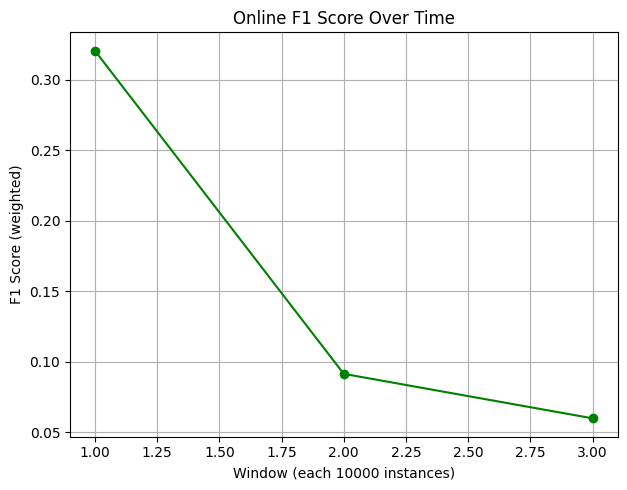

In [ ]:
accuracies = []
f1_scores = []
window_size = 10000

true_labels = []
predicted_labels = []

for i in range(len(X_test)):
    x_i = X_test.iloc[i:i+1]
    y_i = y_test.iloc[i:i+1].values[0]

    pred = rf.predict(x_i)[0]

    true_labels.append(y_i)
    predicted_labels.append(pred)

    # At end of each window, calculate metrics
    if (i + 1) % window_size == 0:

        f1 = f1_score(true_labels, predicted_labels, average='macro')

        f1_scores.append(f1)
        print(i, "f1 score: ", f1)

        # if i > 10000:
        #     break
        true_labels = []
        predicted_labels = []

# Step 7: Plot accuracy and F1 score
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', color='green')
plt.xlabel(f'Window (each {window_size} instances)')
plt.ylabel('F1 Score (weighted)')
plt.title('Online F1 Score Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


# Tarefa


O objetivo desta atividade é evitar que tenha uma queda na qualidade da predição gerando o retreinamento do modelo de tempos em tempos. Para isso, deve-se monitorar a eficiência (f1), se estiver abaixo de um limiar deve-se rodar um retreino do modelo.



▶️ Avaliando modelo: Random Forest
Janela 1000: F1 = 0.4418 | Acc = 0.4500 | Prec = 0.4826 | Recall = 0.4494
⚠️ Retreinamento necessário...
Janela 2000: F1 = 0.6178 | Acc = 0.6320 | Prec = 0.6219 | Recall = 0.6312
⚠️ Retreinamento necessário...
Janela 3000: F1 = 0.6383 | Acc = 0.6430 | Prec = 0.6381 | Recall = 0.6439
⚠️ Retreinamento necessário...
Janela 4000: F1 = 0.5975 | Acc = 0.6030 | Prec = 0.5967 | Recall = 0.6038
⚠️ Retreinamento necessário...
Janela 5000: F1 = 0.5628 | Acc = 0.5680 | Prec = 0.5610 | Recall = 0.5673
⚠️ Retreinamento necessário...
Janela 6000: F1 = 0.5237 | Acc = 0.5180 | Prec = 0.5346 | Recall = 0.5195
⚠️ Retreinamento necessário...
Janela 7000: F1 = 0.6048 | Acc = 0.6090 | Prec = 0.6055 | Recall = 0.6076
⚠️ Retreinamento necessário...
Janela 8000: F1 = 0.6143 | Acc = 0.6170 | Prec = 0.6153 | Recall = 0.6171
⚠️ Retreinamento necessário...
Janela 9000: F1 = 0.5701 | Acc = 0.5690 | Prec = 0.5778 | Recall = 0.5704
⚠️ Retreinamento necessário...
Janela 10000: F1 = 

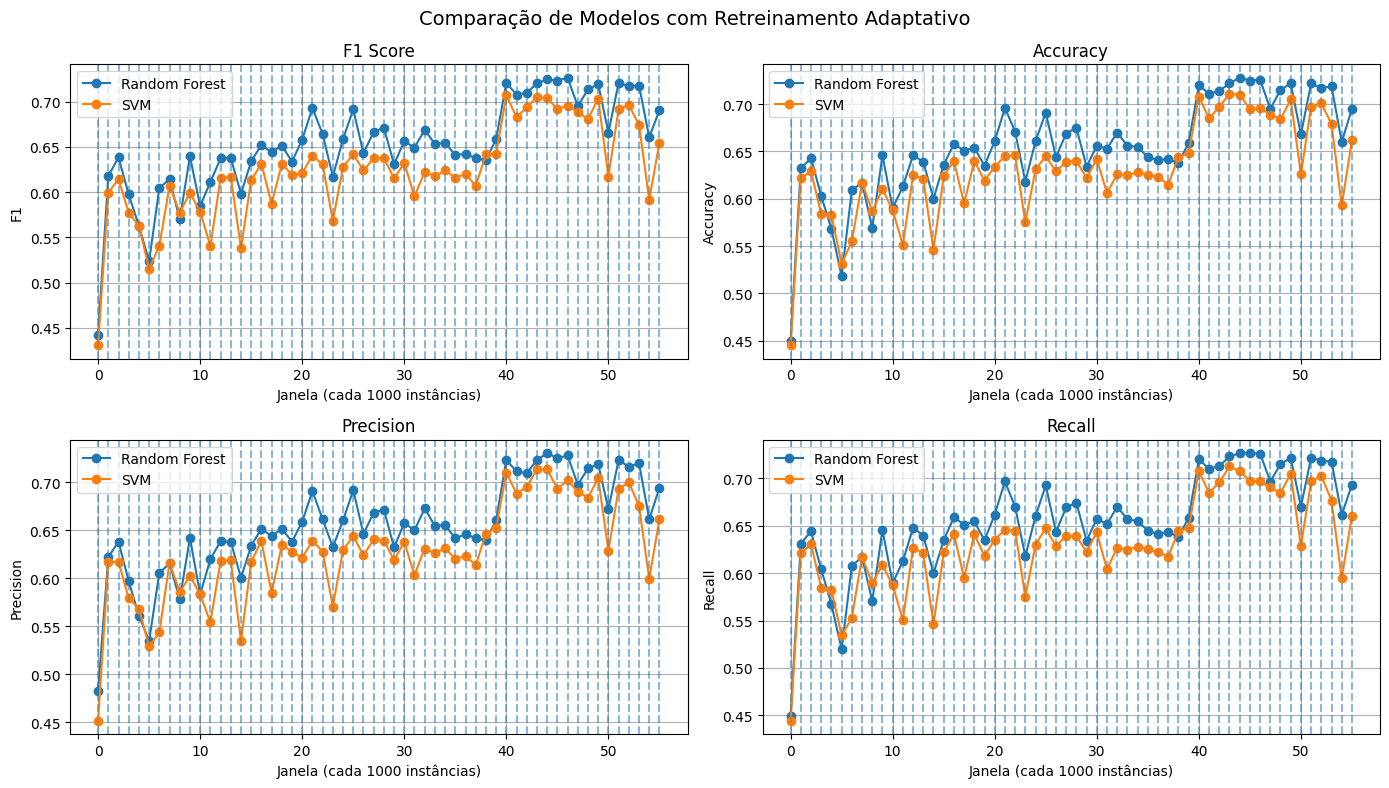

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# =======================
# CONFIGURAÇÕES INICIAIS
# =======================

# Parâmetros
window_size = 1000           # Janela de avaliação
threshold = 0.8              # Limiar para retreinamento
N = 1000                     # Tamanho do conjunto inicial de treino

# ==========================
# CARREGAMENTO DO DATASET
# ==========================

df = pd.read_csv('INSECTS-incremental_balanced_norm.csv')
X = df.drop('Class', axis=1)
y = df['Class']

X_train = X.iloc[:N]
y_train = y.iloc[:N]
X_test = X.iloc[N:]
y_test = y.iloc[N:]

# =====================
# MODELOS A SEREM TESTADOS
# =====================

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

# Armazenar resultados
metrics_history = {name: {
    'f1': [], 'accuracy': [], 'precision': [], 'recall': [],
    'retrain_indices': []
} for name in models}

# ======================
# AVALIAÇÃO ADAPTATIVA
# ======================

for name, model in models.items():
    print(f"\n▶️ Avaliando modelo: {name}")
    model.fit(X_train, y_train)

    true_labels = []
    predicted_labels = []

    for i in range(len(X_test)):
        x_i = X_test.iloc[i:i+1]
        y_i = y_test.iloc[i:i+1].values[0]

        pred = model.predict(x_i)[0]
        predicted_labels.append(pred)
        true_labels.append(y_i)

        # Ao final de cada janela, avalia desempenho
        if (i + 1) % window_size == 0:
            f1 = f1_score(true_labels, predicted_labels, average='macro')
            acc = accuracy_score(true_labels, predicted_labels)
            prec = precision_score(true_labels, predicted_labels, average='macro')
            rec = recall_score(true_labels, predicted_labels, average='macro')

            metrics_history[name]['f1'].append(f1)
            metrics_history[name]['accuracy'].append(acc)
            metrics_history[name]['precision'].append(prec)
            metrics_history[name]['recall'].append(rec)

            print(f"Janela {i+1}: F1 = {f1:.4f} | Acc = {acc:.4f} | Prec = {prec:.4f} | Recall = {rec:.4f}")

            # Verifica necessidade de retreinamento
            if f1 < threshold:
                print("⚠️ Retreinamento necessário...")
                start_idx = i + 1 - window_size
                X_recent = X_test.iloc[start_idx:i+1]
                y_recent = y_test.iloc[start_idx:i+1]
                model.fit(X_recent, y_recent)
                metrics_history[name]['retrain_indices'].append(len(metrics_history[name]['f1']))

            true_labels = []
            predicted_labels = []

# ===========================
# VISUALIZAÇÃO DAS MÉTRICAS
# ===========================

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
metric_names = ['f1', 'accuracy', 'precision', 'recall']
titles = ['F1 Score', 'Accuracy', 'Precision', 'Recall']

for ax, metric, title in zip(axs.flat, metric_names, titles):
    for name in models:
        ax.plot(metrics_history[name][metric], marker='o', label=name)
        # Marcar os pontos onde houve retreinamento
        for retrain_idx in metrics_history[name]['retrain_indices']:
            ax.axvline(x=retrain_idx - 1, linestyle='--', alpha=0.3)
    ax.set_title(title)
    ax.set_xlabel(f'Janela (cada {window_size} instâncias)')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)

plt.suptitle("Comparação de Modelos com Retreinamento Adaptativo", fontsize=14)
plt.tight_layout()
plt.show()


Arquivo encontrado: INSECTS-incremental_balanced_norm (1).csv
[1000] F1: 0.4418 | Accuracy: 0.4500
🚨 Drift detectado na janela até índice 1000 — Retreinando modelo.
[2000] F1: 0.6178 | Accuracy: 0.6320
🚨 Drift detectado na janela até índice 2000 — Retreinando modelo.
[3000] F1: 0.6383 | Accuracy: 0.6430
🚨 Drift detectado na janela até índice 3000 — Retreinando modelo.
[4000] F1: 0.5975 | Accuracy: 0.6030
🚨 Drift detectado na janela até índice 4000 — Retreinando modelo.
[5000] F1: 0.5628 | Accuracy: 0.5680
🚨 Drift detectado na janela até índice 5000 — Retreinando modelo.
[6000] F1: 0.5237 | Accuracy: 0.5180
🚨 Drift detectado na janela até índice 6000 — Retreinando modelo.
[7000] F1: 0.6048 | Accuracy: 0.6090
🚨 Drift detectado na janela até índice 7000 — Retreinando modelo.
[8000] F1: 0.6143 | Accuracy: 0.6170
[9000] F1: 0.5288 | Accuracy: 0.5270
🚨 Drift detectado na janela até índice 9000 — Retreinando modelo.
[10000] F1: 0.6396 | Accuracy: 0.6460
[11000] F1: 0.5793 | Accuracy: 0.5850
🚨

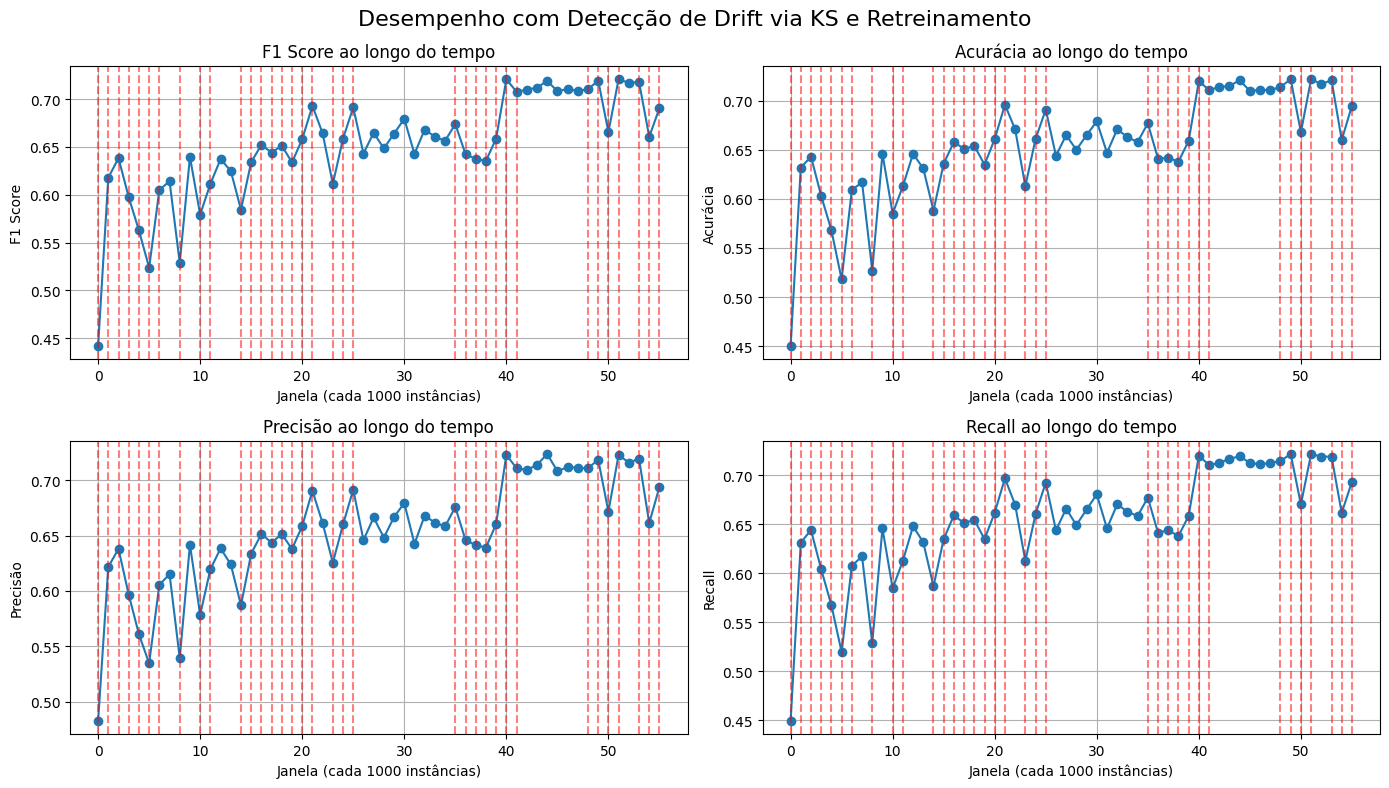

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from scipy.stats import ks_2samp

# ===========================
# CONFIGURAÇÕES INICIAIS
# ===========================

window_size = 1000               # Tamanho da janela para avaliar o desempenho e drift
threshold_pvalue = 0.05          # Limiar de significância para o teste KS
N = 1000                         # Tamanho do treino inicial

# ===========================
# BUSCA E CARREGAMENTO DO CSV
# ===========================

# Listar arquivos .csv disponíveis
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("Nenhum arquivo CSV encontrado no diretório.")

arquivo_csv = csv_files[0]
print(f"Arquivo encontrado: {arquivo_csv}")

# Carregar dados
df = pd.read_csv(arquivo_csv)

# ===========================
# DIVISÃO DOS DADOS
# ===========================

X = df.drop('Class', axis=1)
y = df['Class']

X_train = X.iloc[:N].copy()
y_train = y.iloc[:N].copy()

X_test = X.iloc[N:].copy()
y_test = y.iloc[N:].copy()

# ===========================
# MODELO INICIAL
# ===========================

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ===========================
# HISTÓRICO DE MÉTRICAS
# ===========================

f1_scores = []
accuracies = []
precisions = []
recalls = []
retrain_indices = []

true_labels = []
predicted_labels = []

# ===========================
# FUNÇÃO DE DETECÇÃO DE DRIFT COM KS
# ===========================

def ks_drift_detect(X_ref, X_window, alpha=threshold_pvalue):
    for col in X_ref.columns:
        stat, pvalue = ks_2samp(X_ref[col], X_window[col])
        if pvalue < alpha:
            return True  # Drift detectado
    return False  # Sem drift

# ===========================
# LOOP DE AVALIAÇÃO ONLINE
# ===========================

for i in range(len(X_test)):
    x_i = X_test.iloc[i:i+1]
    y_i = y_test.iloc[i]

    pred = model.predict(x_i)[0]
    predicted_labels.append(pred)
    true_labels.append(y_i)

    # Ao fim da janela, calcula métricas e verifica drift
    if (i + 1) % window_size == 0:
        idx_start = i + 1 - window_size
        X_window = X_test.iloc[idx_start:i+1]
        y_window = y_test.iloc[idx_start:i+1]

        f1 = f1_score(true_labels, predicted_labels, average='macro')
        acc = accuracy_score(true_labels, predicted_labels)
        prec = precision_score(true_labels, predicted_labels, average='macro')
        rec = recall_score(true_labels, predicted_labels, average='macro')

        f1_scores.append(f1)
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)

        print(f"[{i+1}] F1: {f1:.4f} | Accuracy: {acc:.4f}")

        # Verificação de drift com KS
        if ks_drift_detect(X_train, X_window):
            print(f"🚨 Drift detectado na janela até índice {i+1} — Retreinando modelo.")
            model.fit(X_window, y_window)
            X_train = X_window.copy()
            y_train = y_window.copy()
            retrain_indices.append(len(f1_scores))

        # Reset para próxima janela
        true_labels = []
        predicted_labels = []

# ===========================
# VISUALIZAÇÃO DAS MÉTRICAS
# ===========================

plt.figure(figsize=(14, 8))

def plot_metric(metric_values, title, ylabel, position):
    plt.subplot(2, 2, position)
    plt.plot(metric_values, marker='o')
    for idx in retrain_indices:
        plt.axvline(x=idx-1, color='red', linestyle='--', alpha=0.5)
    plt.title(title)
    plt.xlabel(f'Janela (cada {window_size} instâncias)')
    plt.ylabel(ylabel)
    plt.grid(True)

plot_metric(f1_scores, 'F1 Score ao longo do tempo', 'F1 Score', 1)
plot_metric(accuracies, 'Acurácia ao longo do tempo', 'Acurácia', 2)
plot_metric(precisions, 'Precisão ao longo do tempo', 'Precisão', 3)
plot_metric(recalls, 'Recall ao longo do tempo', 'Recall', 4)

plt.suptitle("Desempenho com Detecção de Drift via KS e Retreinamento", fontsize=16)
plt.tight_layout()
plt.show()
